# Intro and Exploration

In this self-guided data analytics project, I wanted to take a look at one of my favorite forms of entertainment: movies. As a big fan of movies, I find them eye-opening in a way where people can watch a story unfold and be immersed in a different world. To further dive into my interest, I wanted to take a look at movies to see how the movie industry is doing based on budget and quality as well as see what other factors may contribute to making a movie good. I found a dataset on Kaggle about the movie industry from 1986-2020 that was scrapped from a popular movie/TV rating site, IMDb.

To start, I wanted to ask a few questions about the data at hand, but more questions will pop up later the more I progress in the project. Here are some guiding questions that I came up with for me to dive into the data.

## The big question: 
* Were movies better then or now? 

## Other supporting questions that interest me: 
* How do movies with higher budgets perform vs. movies with lower budgets?
* Which genres got the highest scores?
* Of the directors, writers, and stars, which contribute to the highest movie scores?
* Do movies with higher scores have higher gross revenue?
* Which directors have the most movies with high scores?
* Are movies getting better scores as time goes by?


# Dataset

I found a dataset on Kaggle about the movie industry from 1986-2020 that contains approx. 6300 movies within this time period. However, as it was publicly aggregated, there are several limitations and things to keep in mind when utilizing this data:
IMDb has a mix of viewer scores and critic scores. Since this is subjective, many people may have different views on what makes a movie good.
Seeing that the data only has around 6300 movies listed, we cannot be sure if this is the actual number of movies that were produced within this time period.
Some movies may have fewer reviews that contribute to their score. The lesser the votes, the more impactful those votes are.

### Glance of the Dataset
Let's take a look at the dataset to see what columns we have.

In [ ]:
/* OVERVIEW OF THE DATA /*

SELECT * FROM random-347304.movies.movies LIMIT 10

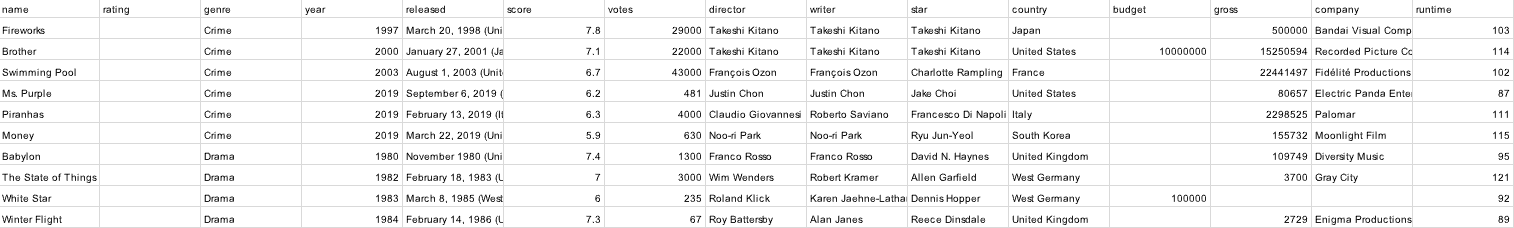

Here's a look at the columns and its data types from the dataset:

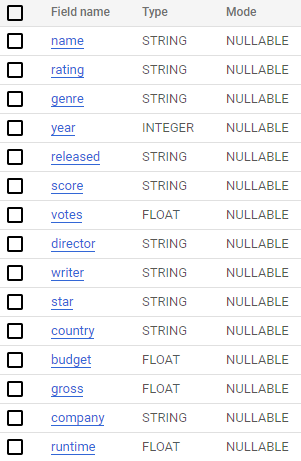

As I browse through the preview, I noticed a few things:
* There are multiple NULL entries. Based on the questions proposed, there are some columns that we won't need to consider such as rating, country, company, and runtime.
* When I first opened the dataset, I noticed that score's data type was set to STRING. To get this fixed since I need to perform calculations on the score, I had to use CAST.
* There are entries where the vital columns have NULL values, thus sorting and filtering where those values have all values necessary to perform analysis are essential to this analysis.

To change the 'score' column to a calculatable data type (such as FLOAT), I did the following:

In [ ]:
/* CASTING DATA TYPES */

SELECT CAST (score AS FLOAT64) FROM random-347304.movies.movies 

To which I was able to successfully change the data type: 

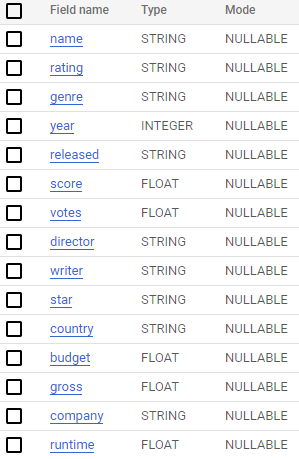

Next, I wanted to filter out the columns that weren't impactful to my analysis and drop values that are NULL that are essential to my analysis. 

In [ ]:
/* CREATING NEW TABLE */

CREATE TABLE movies.updated_movies AS
SELECT name, genre, year, released, score, votes, director, writer, star, budget, gross
FROM random-347304.movies.movies

In [ ]:
/* DROPPING NULLS FROM NEW TABLE AND CREATING ANOTHER FROM IT */

CREATE TABLE movies.updated_non_null_movies
AS SELECT *  FROM random-347304.movies.updated_movies
WHERE name IS NOT NULL AND genre is NOT NULL AND year IS NOT NULL AND
released IS NOT NULL AND score IS NOT NULL AND votes IS NOT NULL AND
director IS NOT NULL AND writer IS NOT NULL AND star IS NOT NULL AND
budget IS NOT NULL AND gross IS NOT NULL

Furthermore, let's see if our newly updated dataset has any duplicates:

In [ ]:
/* FINDING DUPLICATES */

SELECT
  (SELECT COUNT(*) FROM (SELECT DISTINCT * FROM random-347304.movies.updated_non_null_movies)) AS distinct_rows,
  (SELECT COUNT(*) FROM random-347304.movies.updated_non_null_movies) AS total_rows

As a result: 

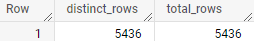

Which is great news as we don't have any duplicates in our data!

Let's take a look at some other values in the dataset: 

In [ ]:
/* FINDING MIN SCORE */

SELECT name, year, budget, score
FROM random-347304.movies.updated_non_null_movies
WHERE score = 
  (SELECT MIN(score) FROM random-347304.movies.updated_non_null_movies)
    
/* FINDING MAX SCORE */ 

SELECT name, year, budget, score
FROM random-347304.movies.updated_non_null_movies
WHERE score = 
  (SELECT MAX(score) FROM random-347304.movies.updated_non_null_movies)

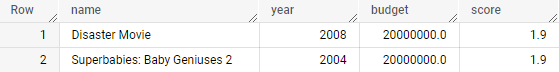

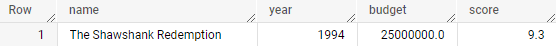

In [ ]:
/* FINDING AVG SCORE OF ALL MOVIES */ 

SELECT ROUND(AVG(score), 1) AS avg_score FROM random-347304.movies.updated_non_null_movies

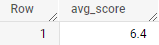

In [ ]:
/* FINDING AVG SCORES FOR EACH GROUP OF DIRECTORS AND NUMBER OF MOVIES DIRECTED */ 

SELECT director, COUNT(director) AS directed_movies, ROUND(AVG(score), 1) AS avg_director_score
FROM random-347304.movies.updated_non_null_movies GROUP BY director ORDER BY directed_movies DESC

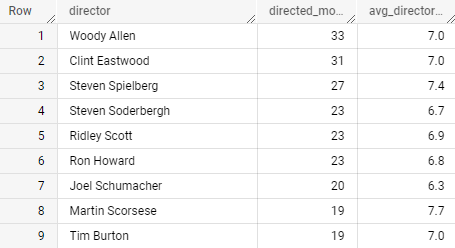

In [ ]:
/* FINDING THE MEDIAN FOR SCORES IN THE DATABASE */

SELECT SUM(score)/2 AS median_score FROM (
    SELECT row_num, * FROM(
        SELECT *, ROW_NUMBER() OVER (ORDER BY score) AS row_num
        FROM random-347304.movies.updated_non_null_movies)
    WHERE row_num = 2718 OR row_num = 2719)

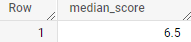

We have a lot of movies to work with, but we have yet to find the spread of the movies across the years. Let's take a look at how many movies were released per year. 

In [ ]:
/* FINDING SPREAD OF MOVIES ACROSS THE YEARS */ 

SELECT year, COUNT(*) AS movie_count
FROM `random-347304.movies.updated_non_null_movies` GROUP BY year ORDER BY year

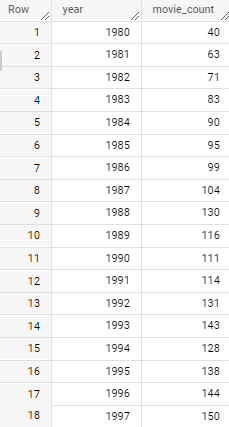

It seems the movies are climbing over the years; let's get a better graphical representation of our dataset. 

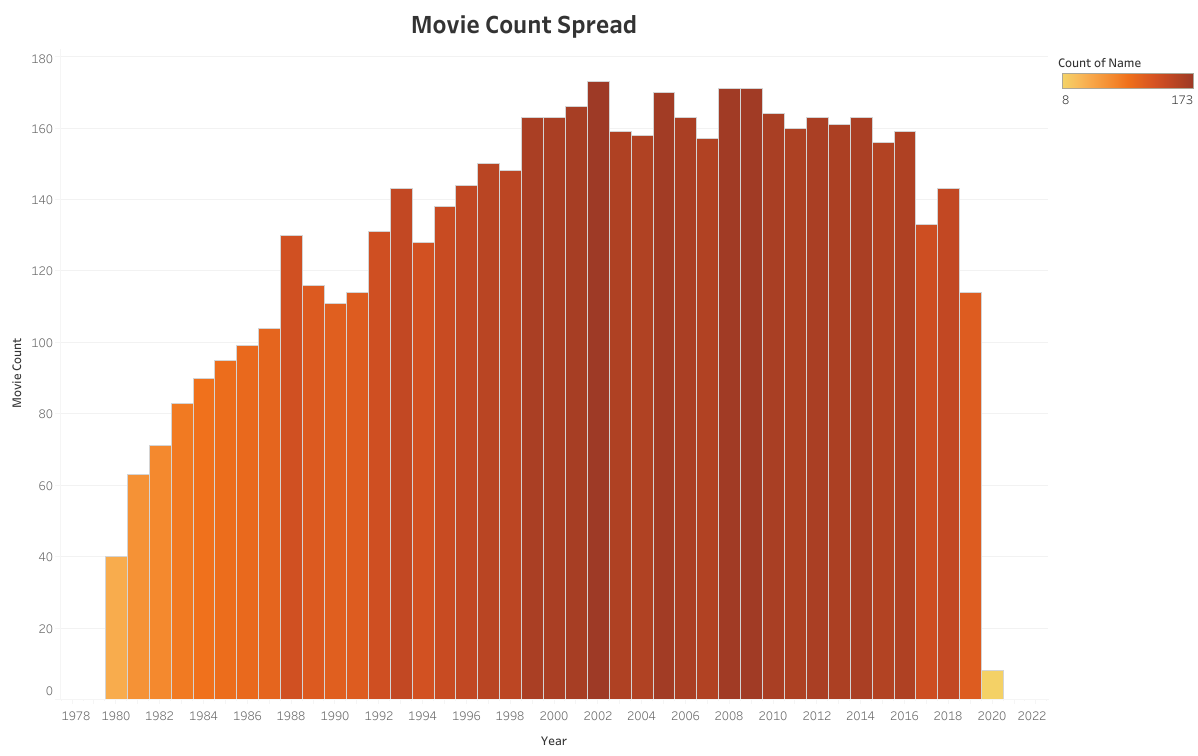

The amount of movies does seem to rise, especially after the year 1998. The amount of movies released starts to plateau a bit but then we notice a decline in the near tail end, which could be due to the deletion of nulls in the databse for the sake of our analysis. 

# Analysis
Now that the preparation of data is done, let's take a look again at some of the supporting questions to see if we can work our way and answer our main question:
* How do movies with higher budgets perform vs. movies with lower budgets?
* Which genres got the highest scores?
* Of the directors, which director attributed to the highest movie scores?
* Do movies with higher scores have higher gross revenue?
* Are movies getting better scores as time goes by?

**For the sake of our analyses, we pinpoint a movie as being "good" as one receiving a score of higher than 7.0**

## How do movies with higher budgets perform vs. movies with lower budgets? 
To get a better understanding of the correlation between budget and score, I loaded the data into Tableau. Here's what I found: 
[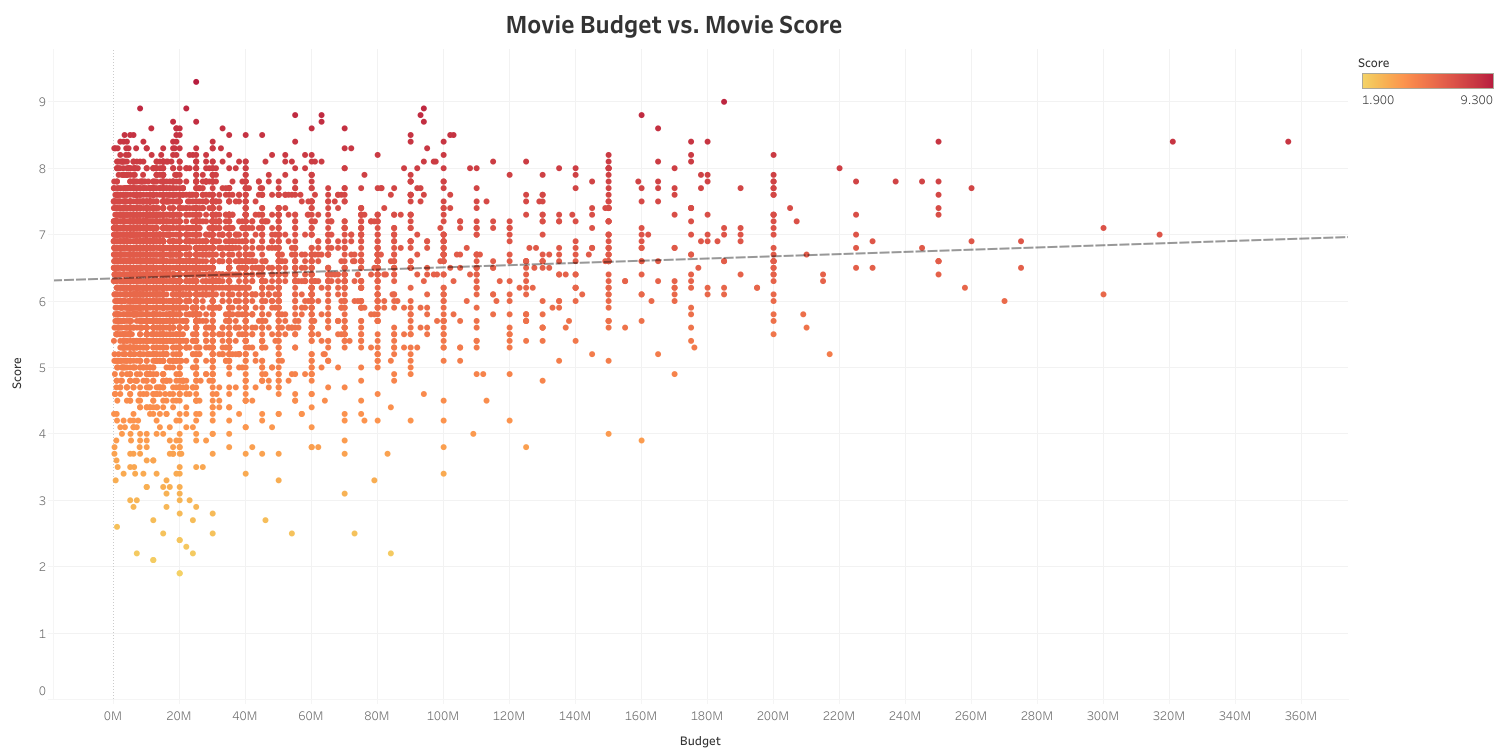](http://)

With an R-Squared: 0.0051541in a linear regression, it is hard to say that there is a correlation between Budget and Score. Based on the data, we see that there are significantly higher amounts of movies that are on the lower end of the budget spectrum.

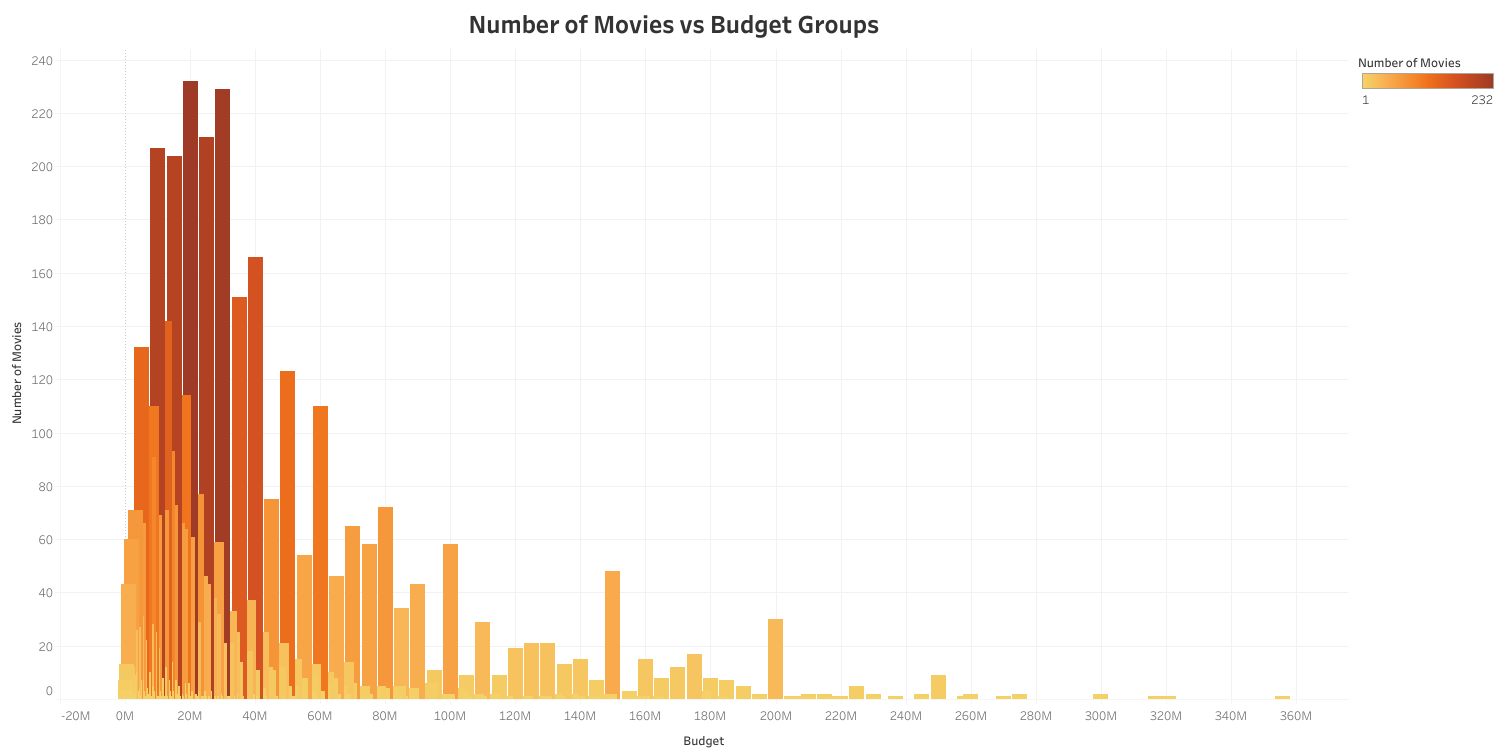

## Do movies with higher scores have higher gross revenue?
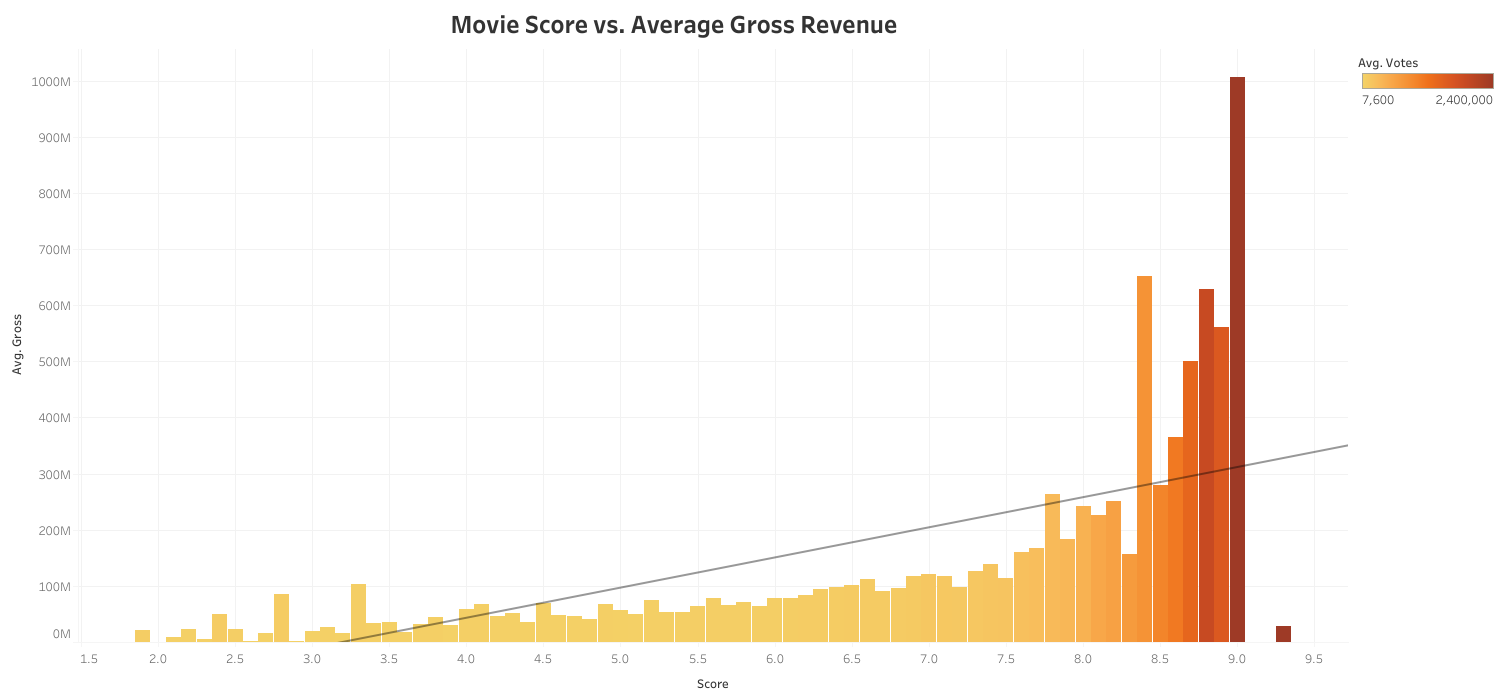

Based on the chart, we can see that with an R-squared: 0.432024 in a linear regression, there is some correlation but it is not a strong one, but based on the slope of the regression in the chart, as the score of the movie increases, so does the gross revenue. Though we must note that there is a movie that received a high score that did not have a high gross revenue (The Shawshank Redemption, 1994). Furthermore, as you can see for some of the scores between the 4 - 6 score range, the amount of gross revenue generated for those movies seemed to plateau, indicating not huge growth as expected if the budget increased.

**Important:** I added in the average amount votes in this graphic to show the reasons as to why some movies received the score that they received. My reasoning was that movies with higher number of votes would have a harder time changing the average score given to that movie while movies with less votes would greater impact a movie's score. However, it is important noting that there are some movies that have a higher average amount of votes because there are less movies with that high of a rating.

To support my charting, I wanted to see what the numbers looked like in SQL and see if they matched with what I saw in the graphs:

In [ ]:
/* FINDING AVERAGE GROSS PER AVERAGE SCORE */ 

SELECT ROUND(AVG(gross), 1) AS avg_gross, ROUND(AVG(score), 1) AS avg_score
FROM random-347304.movies.updated_non_null_movies GROUP BY score ORDER BY avg_score --ASC then DESC

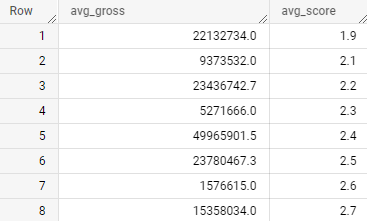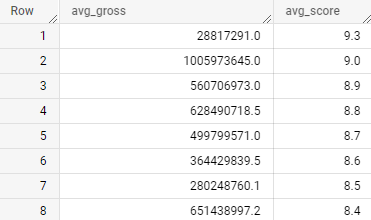

## Which genres got the highest scores?
Let's take a look at the average scores of each genre: 

In [ ]:
/* FINDING AVERAGE SCORES ACROSS THE DIFFERENT MOVIE GENRES */

SELECT genre, ROUND(AVG(score), 1) AS avg_score
FROM `random-347304.movies.updated_non_null_movies` GROUP BY genre ORDER BY avg_score

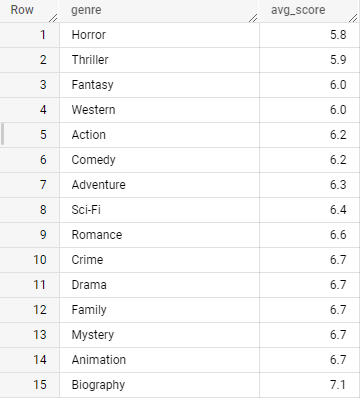

This is also surprising to me personally as I inferred that Drama, Action or Adventure would have received some of the highest scores. Let's take a look at some of the highest and lowest scores of each genre:  

In [ ]:
/* FINDING HIGHEST AND LOWEST SCORES FOR EACH GENRE */ 

SELECT genre, MAX(score) AS highest_score, MIN(score) AS lowest_score
FROM `random-347304.movies.updated_non_null_movies` GROUP BY genre ORDER BY highest_score DESC, lowest_score

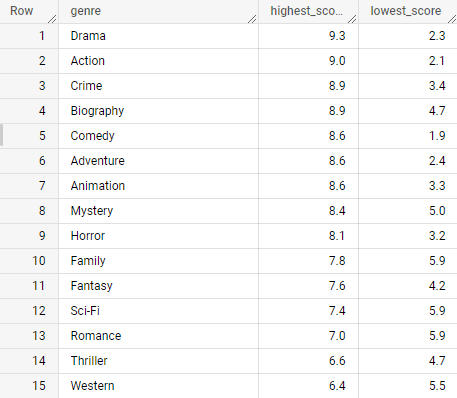

Pretty interesting! Even though Biography got the highest average, Drama received the highest score in the database and Comedy got the lowest score despite seeing Horror getting the lowest average score. Let's take a look at what the highest and lowest scores are for the Drama section: 

In [ ]:
/* FINDING THE MAX AND MIN SCORES FOR THE DRAMA GENRE */ 
SELECT genre, name, score FROM `random-347304.movies.updated_non_null_movies`
WHERE score IN ((SELECT MAX(score) FROM `random-347304.movies.updated_non_null_movies` WHERE genre = 'Drama'),
                (SELECT MIN(score) FROM `random-347304.movies.updated_non_null_movies` WHERE genre = 'Drama'))

--To do the same for the other categories, simply replace the genre. 

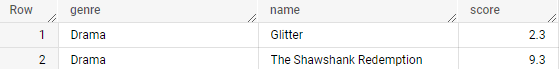

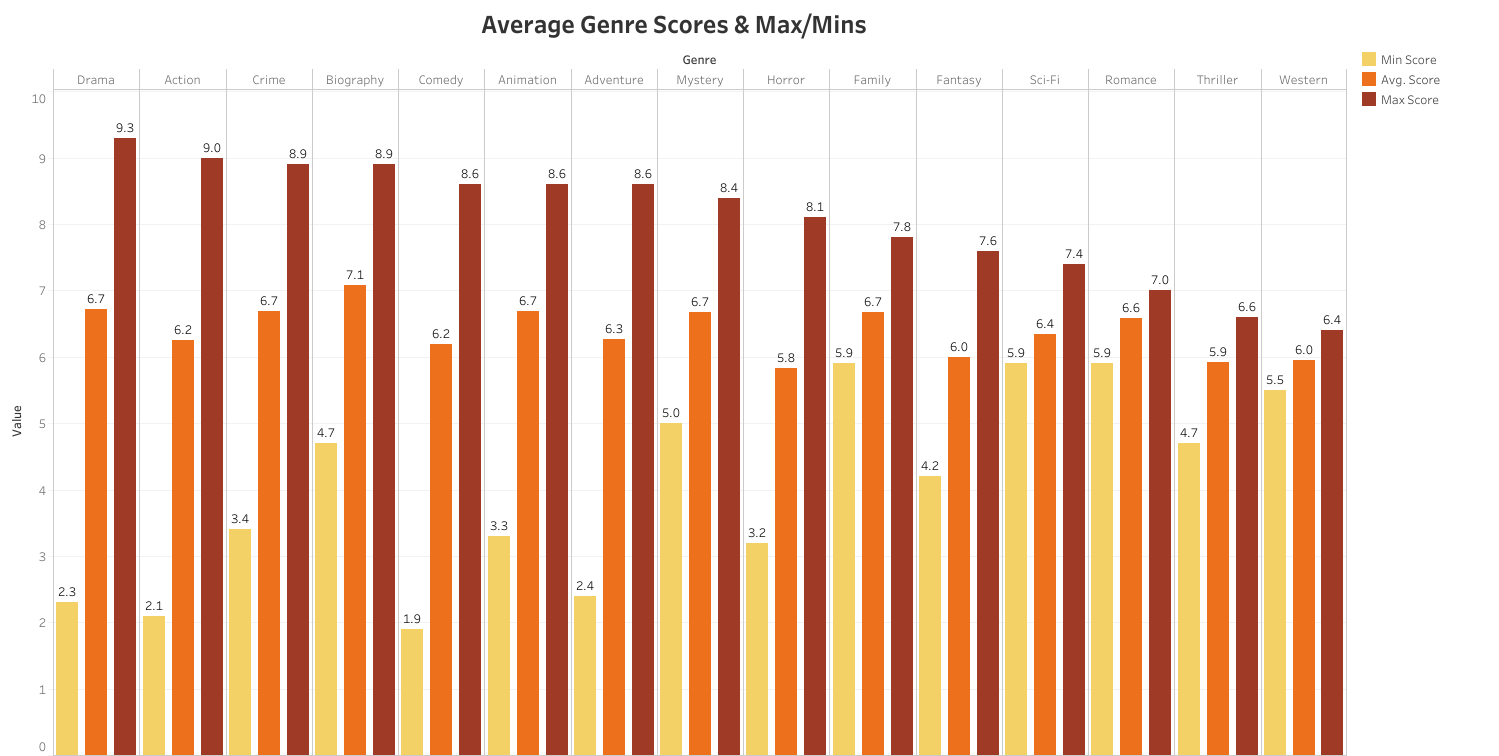

This chart shows some very interesting findings:
* We note that Drama received the highest score for all categories but also contains one of the lowest scores. Same thing can be said about Action, Comedy, and Adventure.
* The Western genre contains one of the lowest average and max scores also had one of the highest min scores, which decreases its range of scores in the database.
* One thing to take into consideration is the amount of movies portrayed in this chart. Although Drama might have one of the lowest min scores, it could be that there are very few movies that could contribute to the overall range of the movie scores. The same can be said about movies in the Western genre. Since there might not be a lot of Western movies, higher minimum scores could very well affect the data and show us a smaller range in its scores.

Let's take a look at the count of movies within its genre and some of its ranges.

In [ ]:
/* MOVIE RANGES ACROSS DIFFERENT GENRES */

SELECT genre, ROUND((MAX(score)-MIN(score)), 1) AS score_range
FROM random-347304.movies.updated_non_null_movies GROUP BY genre ORDER BY score_range

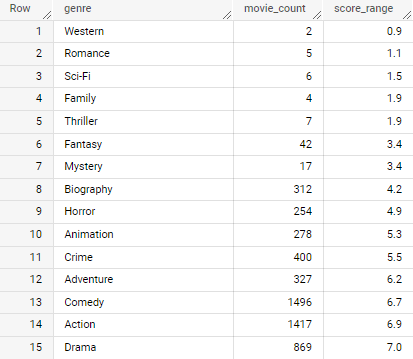

We should also take a look at how many movies from each category lies below the average minimums across all genres. 

In [ ]:
/* CALCULATING AVERAGE MINIMUMS ACROSS GENRES */ 

SELECT ROUND((AVG(min_score)), 1) AS average_min_score FROM (
  SELECT genre, MIN(score) AS min_score FROM random-347304.movies.updated_non_null_movies GROUP BY genre)

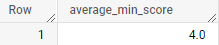

Interestingly enough, there are not a lot of Western movies at all while Comedy and Action had the most movies in its genres. It makes sense that the Western genre had a low range and the Action genre having a wider range due to the amount of movies it has. One important thing to note is that Drama had the highest range while having the third highest movie count. 

Now let's see how many movies lie below that minimum in each category to see if having less low score movies would affect the movie score range by significant amount: 

In [ ]:
/* COUNTING MOVIE SCORES BELOW 4.0 */

SELECT genre, COUNT(*) AS movies_under_min_avg FROM random-347304.movies.updated_non_null_movies 
WHERE score <= 4.0) GROUP BY genre

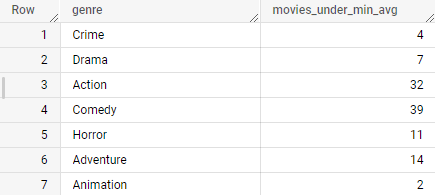

As it seems, Animated movies would have been most impacted by the exclusion of two of its movies would have had its minimum score raised. However, with the other genres, taking out a few of their lowest scores would not have impacted the movie's max/min range by a significant amount. 8 of the 15 genres were also exlcuded from the results as they don't have movies with a score of less than 4.0. 

Conversely, we will do the same for the max scores and see if excluding some of the higher movie scores would significantly affect the range. 

From the same snippet of code as above but replacing MIN with MAX, we get an average_max_score of 8.1. Let's see how many movies in each genre have above this score. 

In [ ]:
/* COUNTING MOVIE SCORES ABOVE 8.1 */

SELECT genre, COUNT(*) AS movies_over_max_avg FROM random-347304.movies.updated_non_null_movies 
WHERE score >= 8.1 GROUP BY genre

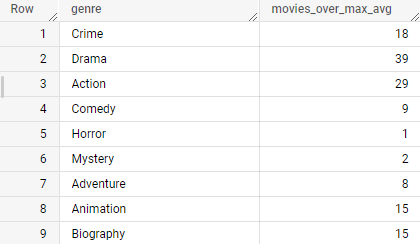

From these results, it shows that Drama had the highest amount of movies above the max average, which shows that excluding some of its higher values won't significantly impact its score range too much. One thing to note is the only movie in Horror to get the score of 8.1 was the highest movie in that category, which means that if we exclude that value from the dataset, Horror would have a lower max score compared to other genres. 

Lastly, let's see which genres garnered the most attention from the masses to see what genre people like vs. how their scores are. 

In [ ]:
/* CALCULATING PER GENRE GROSS REVENUE AND AMOUNT OF VOTES */ 

SELECT genre, SUM(gross) AS gross_sum, SUM(votes) AS total_votes
FROM random-347304.movies.updated_non_null_movies GROUP BY genre ORDER BY gross_sum, total_votes

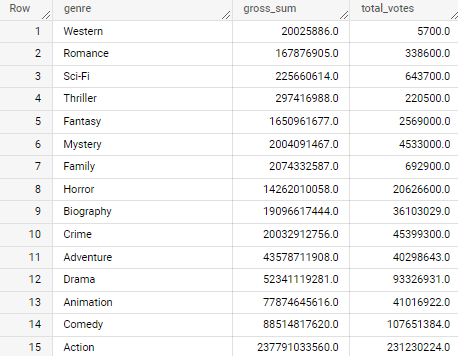

The results present some intriguing findings as I thought Fantasy would have greater gross revenues, but seeing Action at the top was something I had expected to see. What this shows is that since the gross revenue from Action movies is so great, this could lead to production companies wanting to make more Action movies to reap the potential earnings from those movies, which is why there are so many Action movies in the film industry. Paired up with a high amount of votes, this helps stabilize the scores that Action movies get since it has a larger sample size compared to the rest of the genres.  

Lastly, for this question, I wanted to take a look at what movie genres released over the years to see if there were any notable changes in the amount of movies produced for those categories (which could typically indicate demand). 

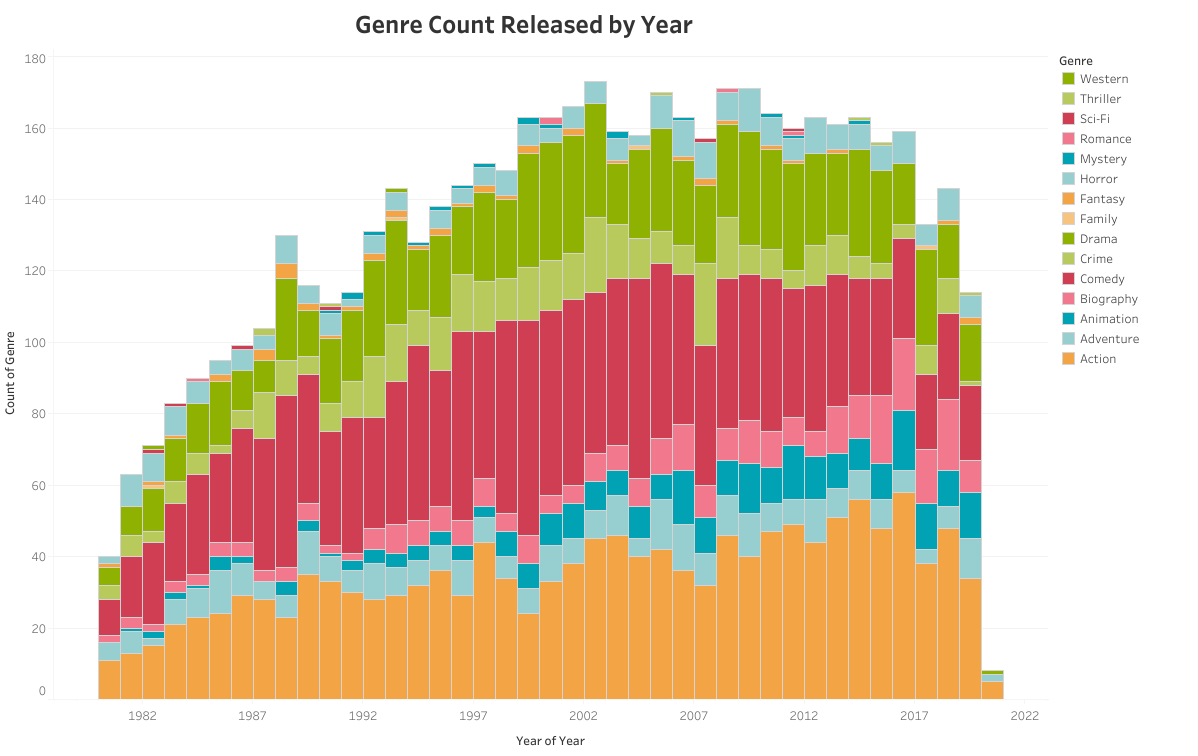

From this, we can make a few generalizations: 
* Action movies have increased over the years, becoming a popular choice of movie to watch and to make. 
* The amount of biographies started to increase over time, which symbolizes that this was not a focus in older movies. 
* Drama stayed pretty consistent, showing that it was a genre that was produced the same amount of movies each year. 

## Of the directors, which director attributed to the highest movie scores?

Taking a look at some of the directors with the highest scores on the movies: 

In [ ]:
/* FINDING THE TOP 15 DIRECTORS WITH THE HIGHST AVERAGE MOVIE SCORES FOR ALL THEIR DIRECTED MOVIES */

SELECT director, ROUND((AVG(score)), 1) AS avg_director_score, COUNT(*) AS movie_count
FROM random-347304.movies.updated_non_null_movies GROUP BY director ORDER BY avg_director_score DESC LIMIT 15

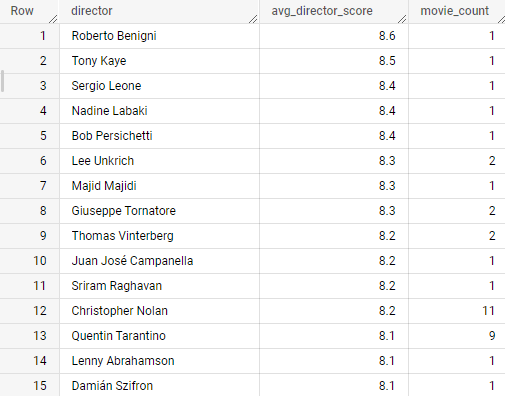

From this, it seems unfair to compare Roberto Benigni to Quentin Tarantino because while Benigni has a higher average score, he only directed one movie while Tarantino directed nine. In fact, 10/15 on this list have a movie count of one movie, 3/15 with two movies, and 2/15 with more than eight movies. To better benchmark directors against each other, we need to find a median or average amount of movies that they have directed to bettter compare apples to apples. Thus, let's find those two summary statistics.

In [ ]:
/* MEDIAN OF THE NUMBER OF MOVIES PER DIRECTOR */ 

SELECT * FROM (
  SELECT *, ROW_NUMBER() OVER(ORDER BY movie_count) as row_num FROM (
    SELECT COUNT(*) AS movie_count, director FROM random-347304.movies.updated_non_null_movies GROUP BY director))
WHERE row_num = 1035

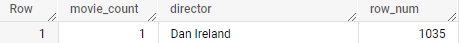

Not ideal. It seems  like there are a lot of directors with only one directed movie. Looking at the mean would be a great way for us to see the average number of movies that the directors in this list has. Before we find the mean, let's see how many directors on the list rank according to how many movies they have. 

In [ ]:
/* FINDING HOW MANY DIRECTORS HAVE MOVIES IN THE DATABASE */ 

SELECT movie_count, COUNT(movie_count) AS director_movie_count FROM (
  SELECT director, COUNT(*) AS movie_count FROM random-347304.movies.updated_non_null_movies GROUP BY director)
GROUP BY movie_count ORDER BY movie_count

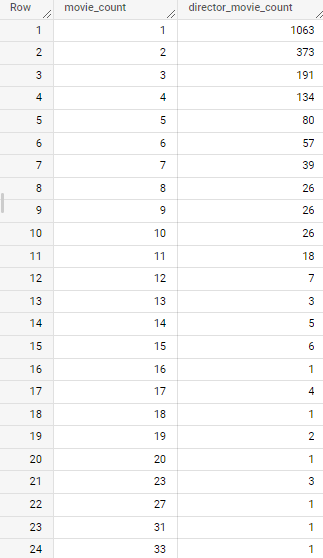

Very surprising results as there are 1063 directors on the list that has a movie count of one. Let's see what the average number of movies per director looks like. 

In [ ]:
/* FINDING AVERAGE NUMBER OF MOVIES A DIRECTOR DIRECTS */ 

SELECT ROUND(AVG(movie_count),) AS avg_directed_movies FROM (
  SELECT director, COUNT(*) AS movie_count FROM random-347304.movies.updated_non_null_movies GROUP BY director)

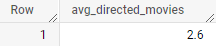

This doesn't really help too much as there can't be 2.6 movies. It seems that since this is so skewed towards directors that have only one movie, we will need to find a threshold to consider to see which directors that have multiple movies perform better based on their movie scores. 

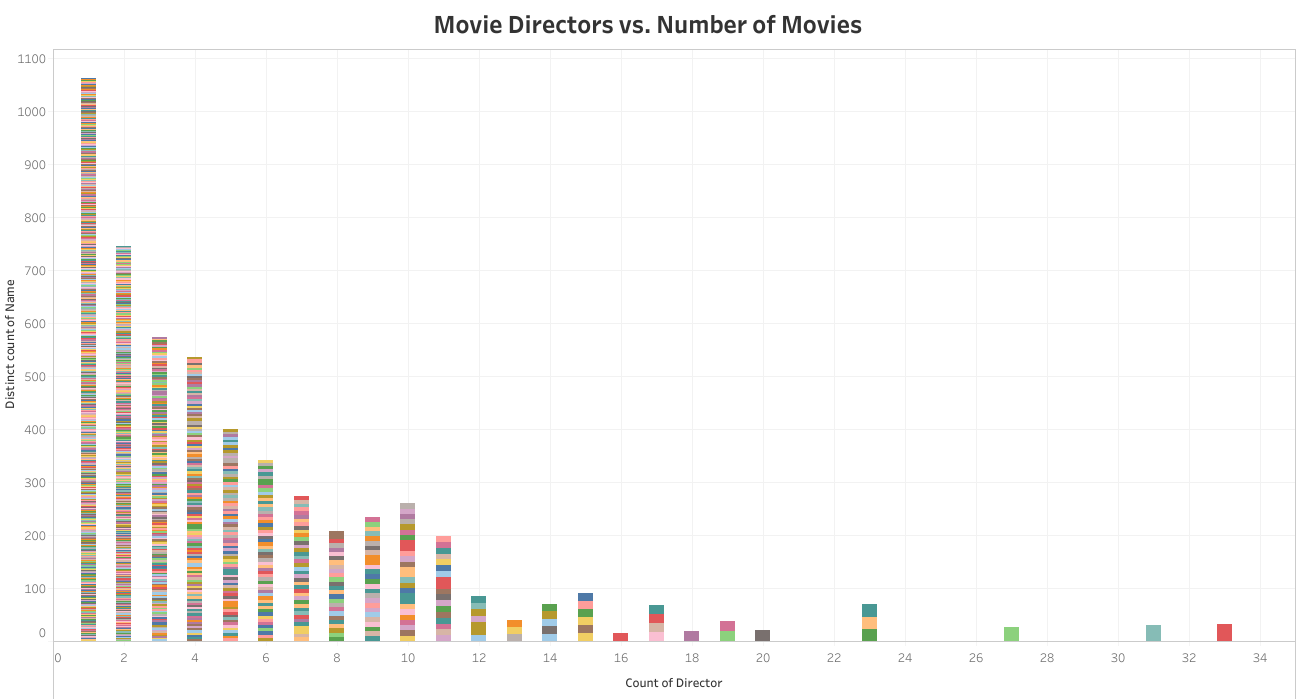

Clearly, there are many directors that have directed just one movie and on the opposite end of the spectrum, we see one director that has directed 33 movies. For the sake of this research, we will take a look at the directors' average movie score equal to or more than 9 movies. 

In [ ]:
/* FINDING DIRECTORS WITH 9 OR MOVIES DIRECTED AVERAGE SCORES */ 

SELECT director, COUNT(*) AS movies_directed, ROUND(AVG(score), 1) AS avg_score
FROM `random-347304.movies.updated_non_null_movies` GROUP BY director HAVING movies_directed >= 9 ORDER BY avg_score DESC

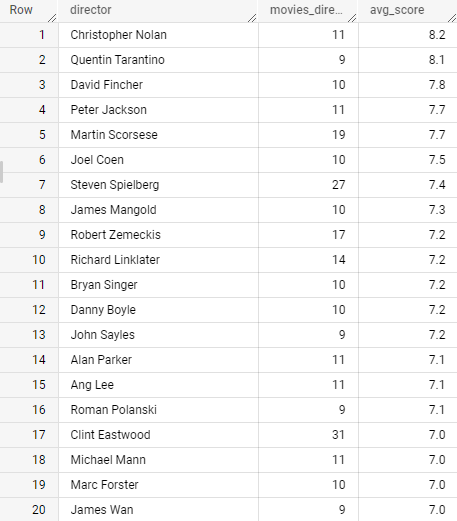

Based on this, here are some notable directors that have a high average movie scores based on the amount of movies they have directed. Still, we can't compare apples to apples here as some directors have directed more movies relative to other directors and still have a high average score. Therefore, weighing these average scores on a common scale will better allow us to see how directors do based on how many movies they have directed. 

To find the weighted average for each of the directors, I started off by finding the numebr of movies directed and the average score.


In [ ]:
/* FINDING AVERAGE SCORE AND AMOUNT OF MOVIES PER DIRECTOR *

SELECT director, COUNT(*) AS movies_directed, ROUND(AVG(score), 1) AS avg_score,
FROM `random-347304.movies.updated_non_null_movies` GROUP BY director HAVING movies_directed >= 9 ORDER BY avg_score DESC

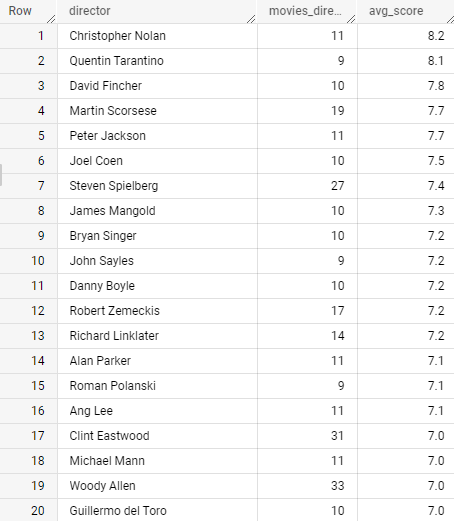

To find the weighted averages, I created another column that calculates the product between the movies_directed and avg_score columns then found the SUM of all of those values. The overall weighted total equates to 8615.9. Then I divided the product of the movies_directed and avg_score columns again and found the quotient of that product over the overall weighted total. 

In [ ]:
/* COMBINING THE PREVIOUS QUERY WITH THE WEIGHTED TOTAL CALCULATIONS */ 

SELECT *, ROUND(((avg_score * movies_directed)/8615.9), 5) AS weighted_score FROM (
  SELECT director, COUNT(*) AS movies_directed, ROUND(AVG(score), 1) AS avg_score,
  FROM `random-347304.movies.updated_non_null_movies` GROUP BY director HAVING movies_directed >= 9 ORDER BY avg_score DESC)

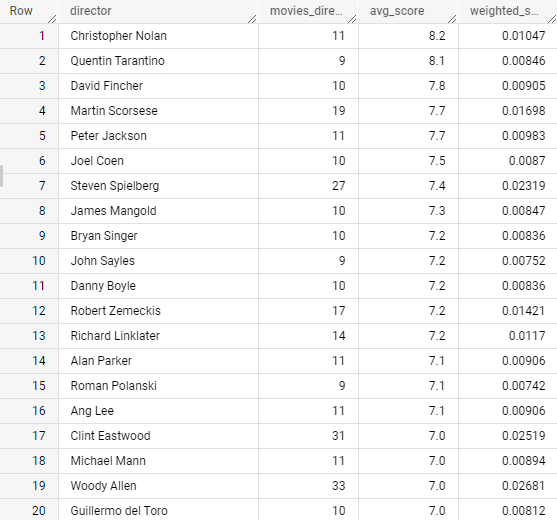

Now we can compare the values a bit easier. Based on these results we can make a few observations: 
* Woody Allen, with 33 movies, has the highest weighted score on this list. Even if his avg_score is only 7.0 as opposed to some of higher averages seen above, he also has a lot of movies that he has directed over his lifetime. 
* There is an error on the sheet as there is a director named "Directors," this should be noted as there are 16 movies that are not null, but has no real director name. 
* Quentin Tarantino, director of 9 movies on the list, has the highest avg_score in the top 50 of this order, but has a low weighted score. While we can't directly say that Woody Allen is better than Quentin Tarantino as a director, this weighting mostly counts the amount of movies a director has. Thus, Tarantino could objectively be a better director than Allen, he just doesn't have as many films. 
* This weighting is not to be taken literally as it seems directors with less movies are shown more at the bottom of this ranking. However, this was made to combat directors with only one movie being ranked better than directors with lots of movies. 

However, to asnwer our initial question of which directors end up having the highest scores, we can simply look at the results from the previous query and see that **Nolan, Tarantino, Fincher, Scorsese, and Jackson** are among the top 5. 

On a final note, remembering that the top genre was Biography, I went ahead and wrote a query to see a list of the top directors that directed Biographies and had some interesting findings: 

In [ ]:
/* FINDING DIRECTORS THAT DIRECTED BIOGRAPHY MOVIES AND THOSE AVERAGE SCORES AND MOVIE AMOUNT */ 

SELECT director, ROUND(AVG(score), 1) AS biography_avg, COUNT(*) AS biography_count FROM (
  SELECT director, score FROM random-347304.movies.updated_non_null_movies WHERE genre = "Biography")
GROUP BY director ORDER BY biography_avg DESC

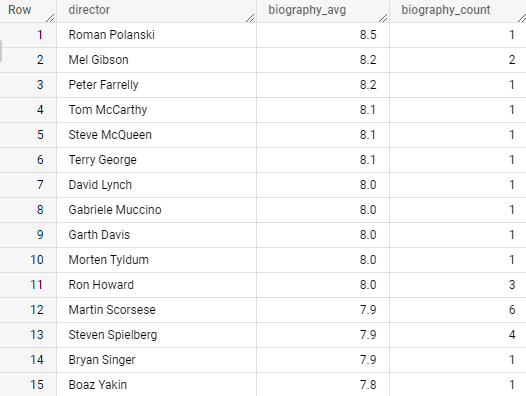

While a lot of the entries shown above only have one movie, three notable directors, Martin Scorsese, Steven Spielberg, and Bryan Singer (from the list of top directors), were featured in this list. While Singer only had one movie as well, it was interesting to see that Scorsese and Spielberg had high averages within the Biography genre. Perhaps directors could lead to higher scores as they are ranked within the top in the Biography genre (if we exclude directors with only one movie) since they are high-performing directors that made films in a genre that is considered the one with the highest averages. 

## Are movies getting better scores as time goes by? 

The ultimate question for this study, but finding the answer to this is not simple. While the previous questions helped, they don't directly pinpoint if movies are doing better as time goes on. One thing that I can think of is the active years of the directors. Based on the top 20 directors, are there more directors that are currently active that are getting better average scores? More research has to be done on that part to see if there are more active directors as the database does not provide that. Let's also designate "new" movies as movies released after the year 2000 and "older" movies as movies released prior. 

*(Note: This is because the database ranges from 1980 - 2020, so I chose the midway point to differentiate the two movie eras. One limitation to this is that there are significantly fewer movies in the years of 2021 and 2020, which could impact the data and not truly represent a full representation of the newer movies.)*

We could see when the movie was released and what score those movies received. Let's take a quick look at the number of movies released per year then the average score of movies over the years. 

In [ ]:
/* AVERAGE SCORE PER YEAR AND NUMBER OF MOVIES RELEASED */ 

SELECT year, ROUND(AVG(score), 1) AS year_avg, COUNT(name) AS movie_count
FROM `random-347304.movies.updated_non_null_movies` GROUP BY year ORDER BY year

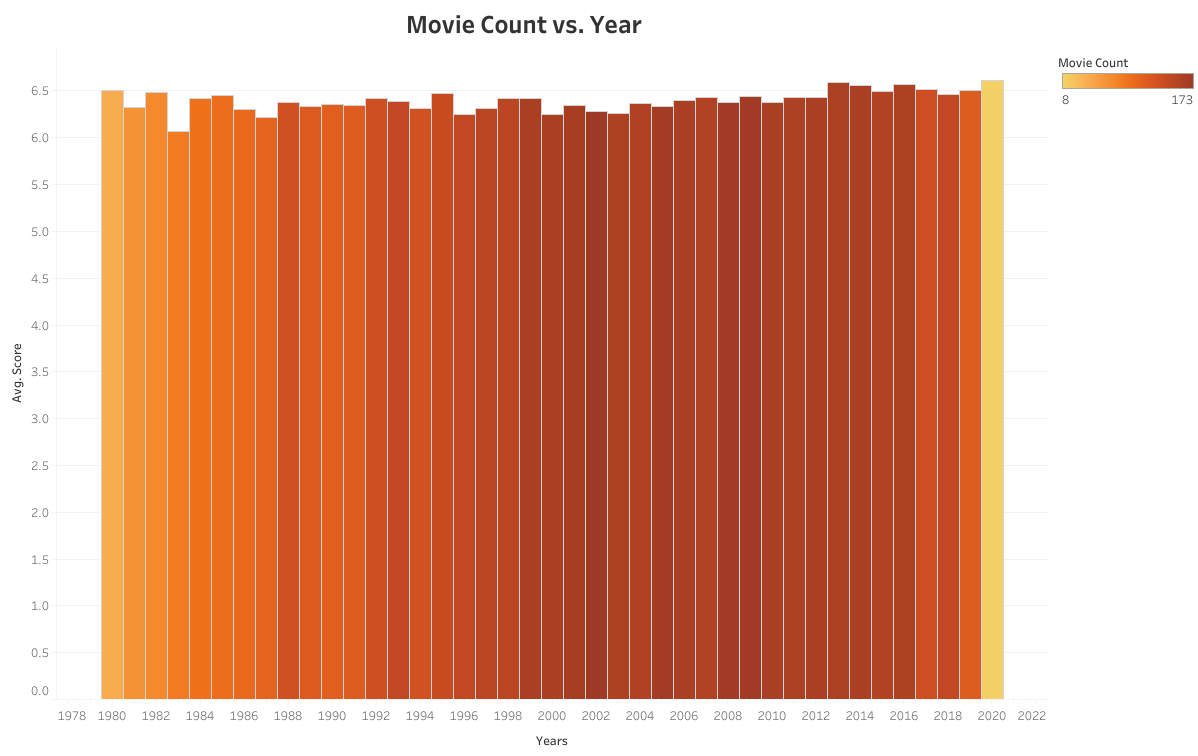

Since this database was released in the year 2020, there are a lot of movies yet to be released, thus we see a discrepancy in the number of movies. We need to take this into account when performing our analyses as that is not representative of all movies yet to be released whether they are good or bad. In addition to this, the average scores over the years seem pretty even around the 6.5 score range. Though, some years had less movies released, so we will have to take that into account. Based on this alone, we cannot say that movie scores have significantly increased over the years. 

Let's pivot a little and take a look at the budgets vs. scores chart again, but this time with years taken into account: 
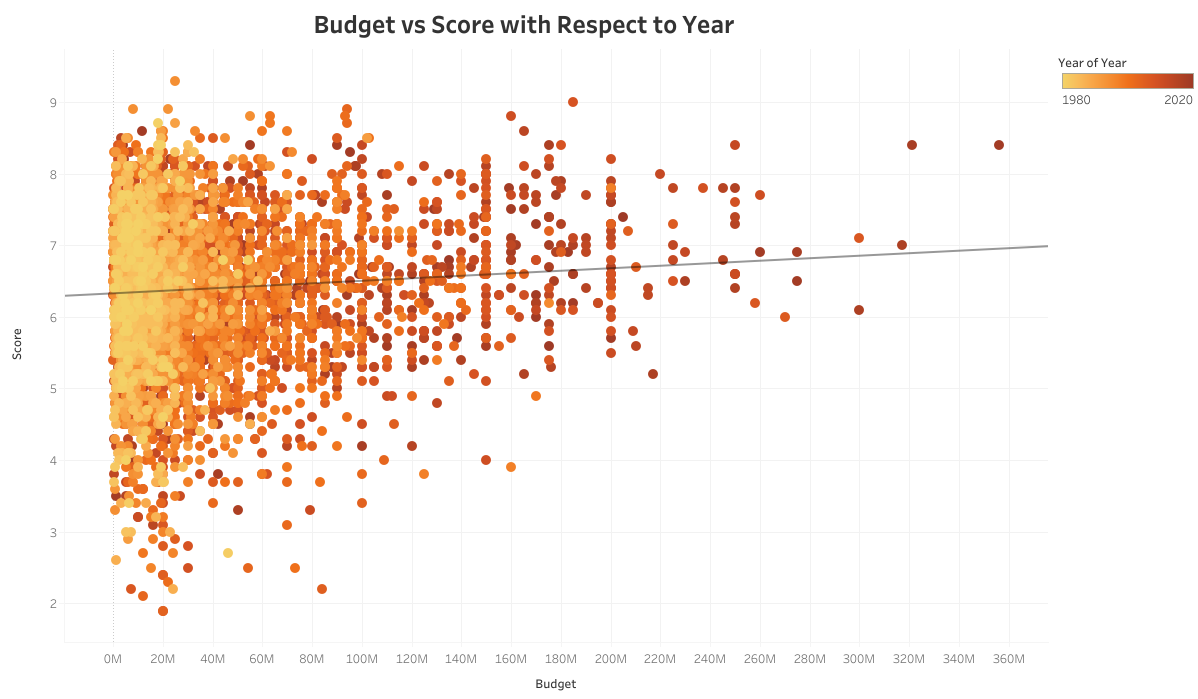

This shows it a bit more clearly than the first visualization, but as we can see, there are a lot of movies that are on the older end of the spectrum belonging to the lower budget groups. Most movies barely break 80M but this could be because of inflation or a lesser focus on the entertainment industry back then. On the contrary, there are some movies here that are just as high in terms of score compared to newer movies. Let's pivot and see how many movies received scores of higher than 7.0 per year since averages did not clearly justify if movies were getting better over time. 

In [ ]:
/* FINDING COUNT OF MOVIES FOR EVERY YEAR WHERE SCORE >= 7 */ 

SELECT year, COUNT(*) AS movies_over_7 FROM (
  SELECT year, score FROM `random-347304.movies.updated_non_null_movies` WHERE score >= 7)
WHERE score >= 7 GROUP BY year ORDER BY year

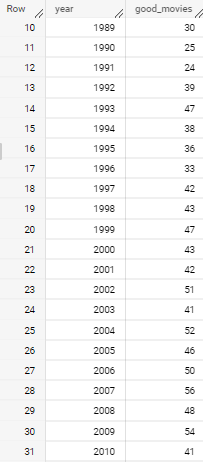

Note: These results zoom in on the years 1990 - 2010 just to give a preview of the results here. While it may seem that the amount of good movies (movies >= score of 7) has been increasing over the years, we must take account that the demand for growth in the entertainment industry over the years has also undeniably increased as well. Therefore, we cannot yet say that movies are getting better over time as there are more movies that are being produced and as a result, more good movies being released as they have higher chances to be good with higher budgets. 

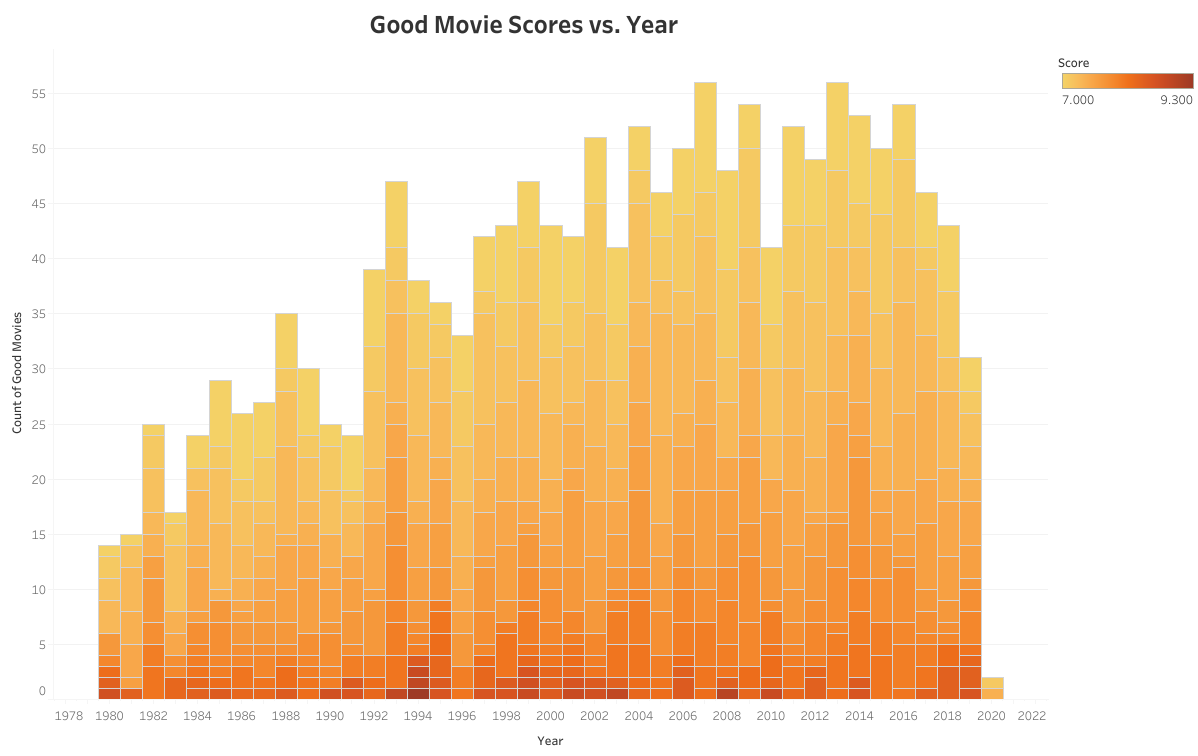

Based on this chart, we can see that the amount of good movies have indeed risen over the years. Furthermore, the dark orange color symbolizes the amount of movies with scores near 10.0. There is also a drop of good movies in 2020 since this database was compiled in that year, so the movies yet to be released for 2020 have not been scored. In addition to this, we also see movies released after 2016 to drop, which could be due to not many votes that contribute to the scores for those years as those movies haven't been throughly reviewed yet.

Let's take a look at the opposite end of the spectrum and see how many bad movies (movies < score of 7) were released over the years. 

In [ ]:
/* FINDING COUNT OF MOVIES FOR EVERY YEAR WHERE SCORE < 7 */ 

SELECT year, COUNT(*) AS bad_movies FROM (
  SELECT year, score FROM `random-347304.movies.updated_non_null_movies` WHERE score < 7)
WHERE score < 7 GROUP BY year ORDER BY year

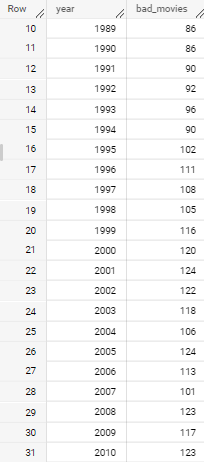

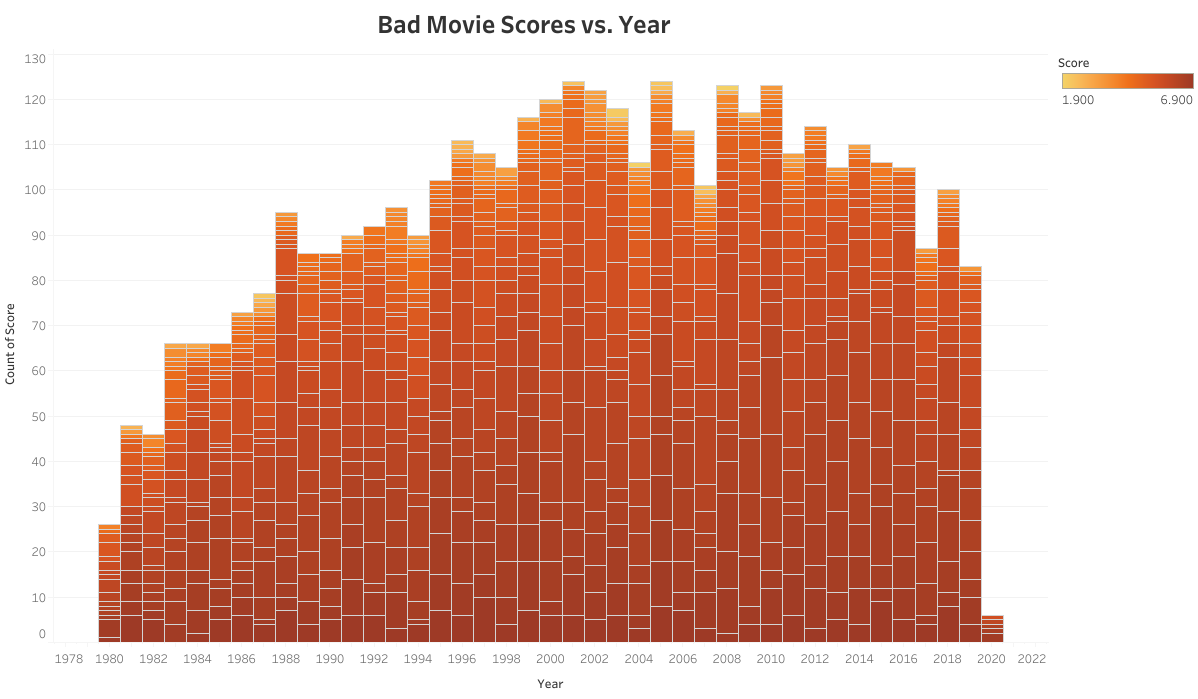

The trend is similar, but we must keep in mind that there are also a lot of bad movies being released over the years. However, since movies are graded on a scale of 1-10 and this is for scores under 7, there are a lot more movies that qualify for this range. It's important to note that if we want to reiterate this analysis, we might need to better define what a bad vs. good movie is in terms of the 1-10 scale. 

In order to get a better idea if movies are getting better over the years, we need to set up a ratio that compares good to bad movies and see if those ratios are increasing to justify that movies are getting better as time goes by. 

In [ ]:
/* CREATING A TABLE TO PERFORM FULL JOIN ON THE GOOD AND BAD MOVIES */ 

CREATE TABLE movies.good_and_bad_movies AS (
    SELECT good_movies.year, bad_movies.bad_movie_count, good_movies.good_movie_count
    FROM movies.good_movies FULL JOIN movies.bad_movies ON bad_movies.year = good_movies.year ORDER BY year)

In [ ]:
/* FINDING THE GOOD TO BAD MOVIE RATIO FOR THE NEWLY CREATED TABLE */ 

SELECT *, ROUND((good_movie_count / bad_movie_count), 3) AS good_bad_ratio FROM `random-347304.movies.good_and_bad_movies`

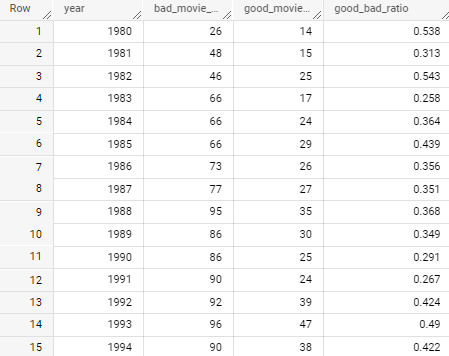

So what does this mean? It shows that as time goes by, there are consistently more bad movies than good movies since the ratio never breaks 1.0. Again, this could be due to the threshold where we determine movies being good as having scores of over 7. Let's see how this looks graphically to get a better sense of our ratios. 

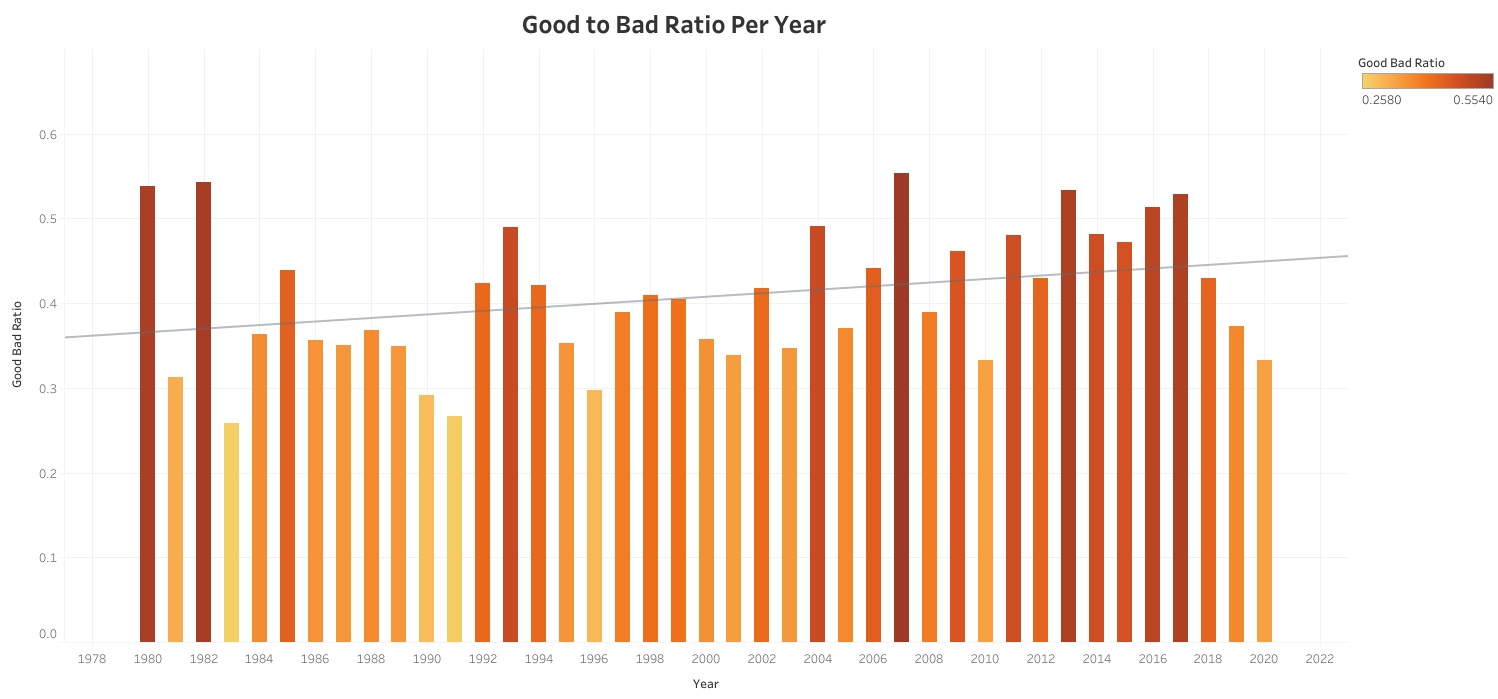

Interestingly enough, the trend line seems to point upwards. The slope appears to be slightly positive, but still not significant enough to show that the ratios are getting beter as time progresses. An important feature to note is that the three largest ratios belong to the years 1980, 1982, and 2007, two of which are in the "older" movies category. Although the ratios seem to be more steady after the year 2012, we must take into account that budgets have also increased over time, thus pushing the standards for movies to be better over time, but with the ratios not climbing to 1.0, we cannot completely say that that movies are not getting better. 

# Closing Remarks

From this study, I learned a lot of things that I did not expect going into this exploration. As a huge fan of movies, I expected movies to have gotten better over time based on the amount of focus in the entertainment industry. The demand for movies to be made and the supply of movies in order to gain profits has definitely climbed over the years, but the results from this exploration has not been concrete evidence to show that movies have been improving over the years. Here's a recap of the questions and conclusions from each: 

### How do movies with higher budgets perform vs. movies with lower budgets? 
Even movies with lower budgets had high scores. Though the max score a movie can receive is 10, it is commonly expected that movies with higher budgets would perform better since they can cast a stronger cast, spend more on editing and production, and market the movie better before it is released. However, there are a lot of movies that feature a lower budget that still perform well, thus we cannot say that a higher budget ultimately leads to higher movie scores despite the amalgam of resources spent. 

There were also instances where movies with lower budgets still did well. Taking a second look at this chart, we can see that a lot of the older movies actually had lower budgets but still had good scores. Even genres like Comedy that typically have lower scores and lower budgets still attracts a lot of attention, which leads us to rethink what it is that makes a movie good. Is it the success in the box office in terms of gross revenue earner or is it the fact that the movies are only graded to be good due to a small group of critics that are representating a population that might not agree with their views? 

### Which genres got the highest scores? 
I definitely had a favorite genre (Drama) in mind and my thought was that since that was the genre that I did a lot of research on before watching new movies, that genre would have the highest average movie scores, but to my surprise, it wasn't at the top. Although Drama did receive the highest score in the entire database, it also received a really low score (2.3) that was unexepcted of it when I first saw the results. I wanted to see if there was a specific genre that performed well, which I found that Action movies are the ones that take the throne in terms of movies released and gross revenue earned from that genre. 

The leading genre with the highest average score are the Biographies and there are a few things to note about this genre. Biographies were ranked in the middle section in terms of amount of movies and range relative to the rest of the genres in the database and also had a mid-range amount for gross revenue. This is an interesting finding because even though this genre recevied the highest average score, it did not get as much attention as Action or Drama since those are the genres with the highest grossing revenues, movies made and votes submitted. From this analysis of the scores earned in the movie genres, it provided insight on why more movies were being made as time went by which could help lead to seeing if the demand for these types of movies would come with greater quality of movies, but if this was the case, Action should be the highest scoring genre. As a final remark, seeing Biographies stand as the top rated genre was interesting as it proves a movie can be good without being the one in the limelight and gaining all of the revenue in the market. 

### Of the directors, which contributed to the highest movie scores? 
By taking a look at the scores based on the director, we could get an idea of a movie's success based on the director's name portrayed in the movie when it was released. As a reminder, here is what the spread of movies released over the years looks like: 

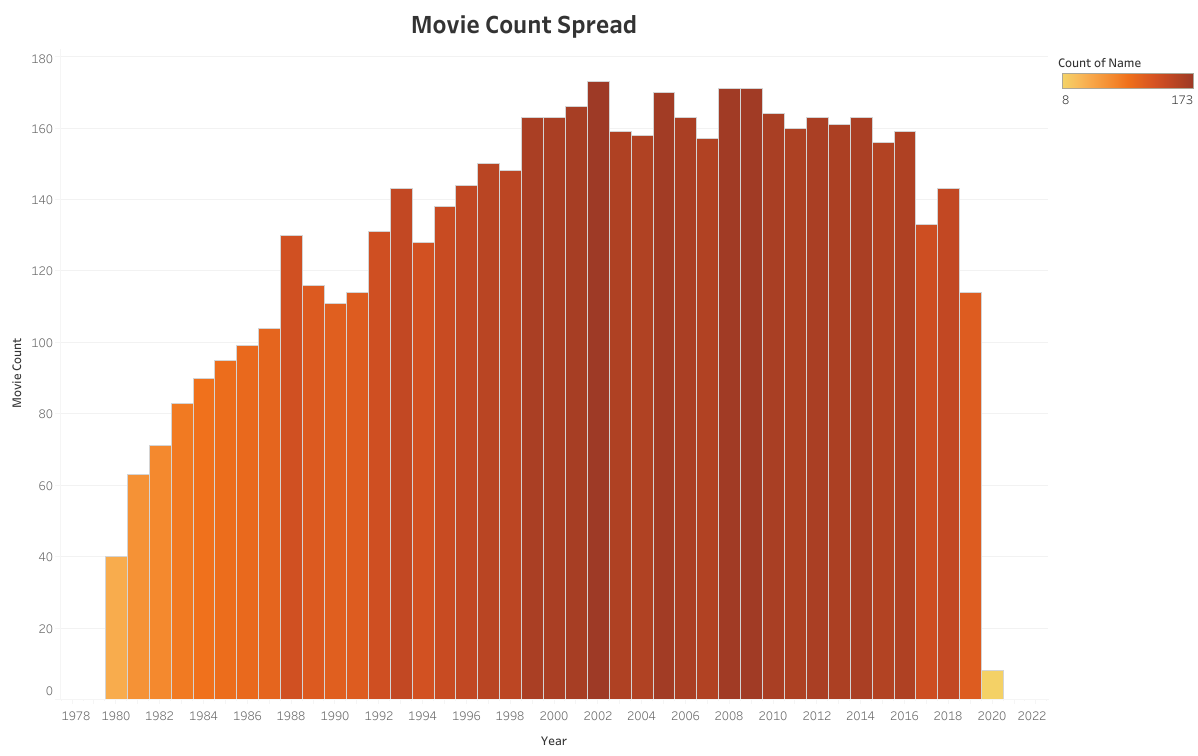

What does this depict? It shows that since more movies were created especially after the year 1998, there was also a rise of more directors. This could be due to the normalization of creating movies as time went on with a greater demand for movies to be released. Thus, this increases the chances of successful directors to continue making films that people would watch due to the director's reputation and with more directors, we can infer that we have higher chances of having good movies. However, when we look at the amount of directors creating films scoring higher than a score of 7, we see this trend: 

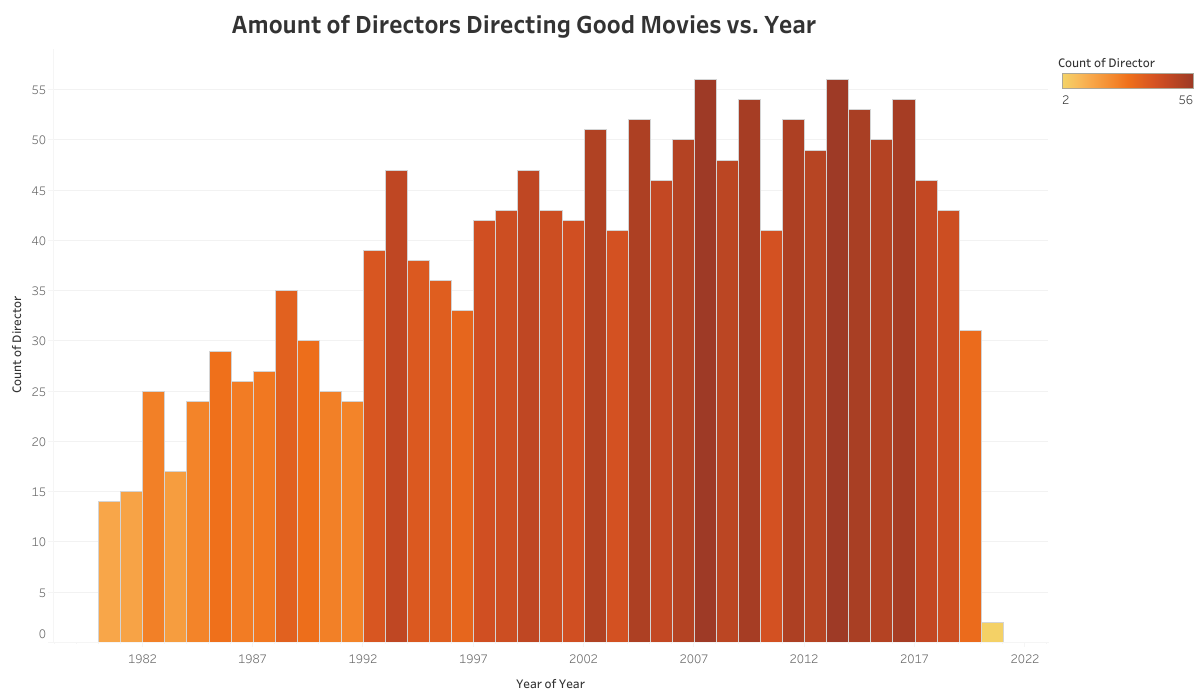

Which could help with the argument in saying that as time went on, more directors were active and creating more movies. With the increase in amount of movies, there would be a higher chance for a movie to be good, which is what we see in this chart as there were more movies with higher scores that could be correlated with the quality and direction from a movie's director. Although it is inaccurate to say that the director had the most influence on the movie's score, (which we would have to also consider the stars, the production company, community interest, budget, etc.) we do see a positive trend in the rise of more movies attaining higher scores as time goes by. 

Furthermore, if we take a look at the results from a previous query here: 

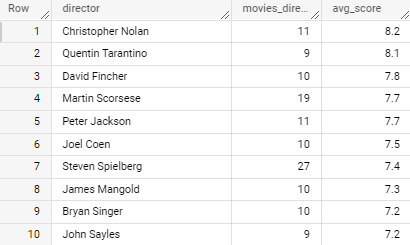

We can take a look at the top 10 directors to see when their good movies were released: 

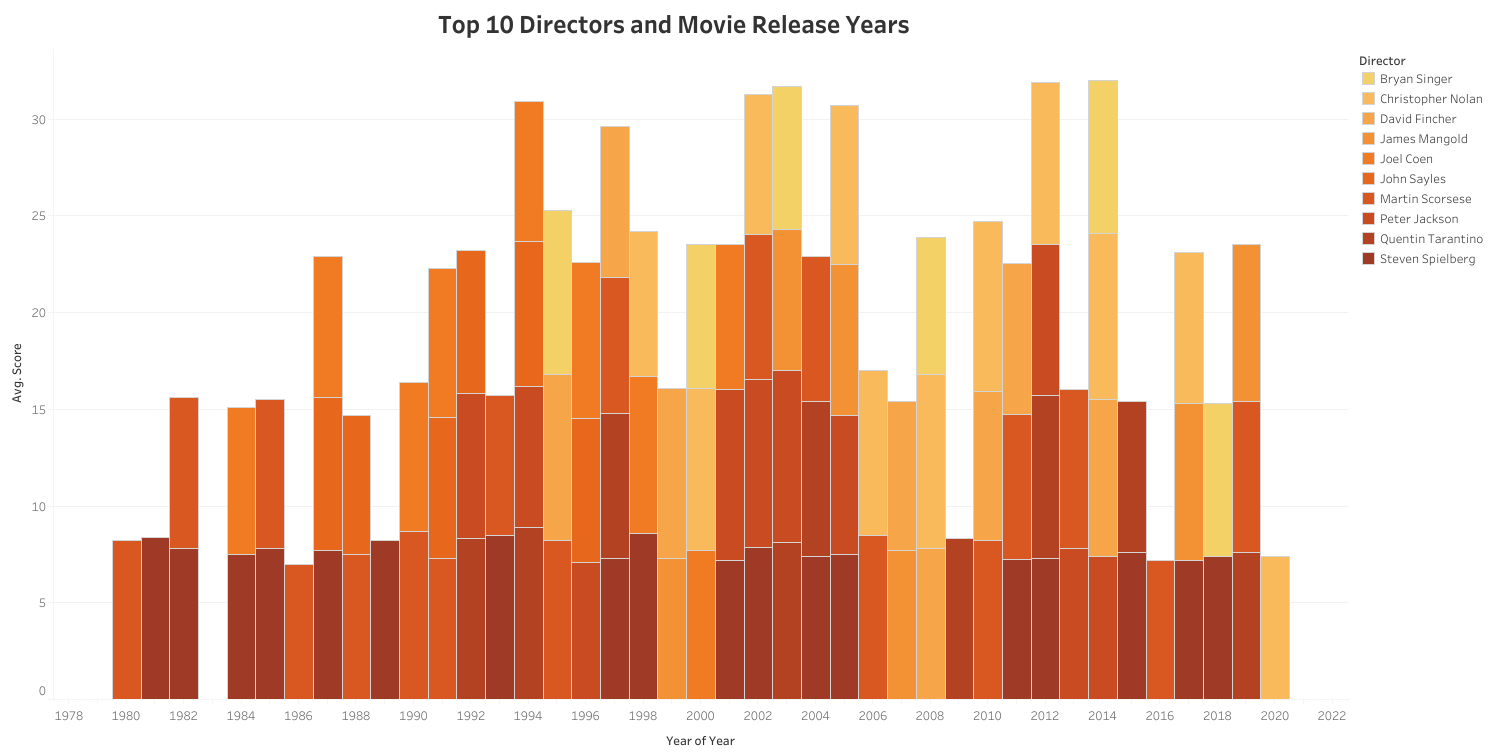

Based on this alone, we can see that the chart seems pretty balanced. While there is a slight increase in the amount of good movies released after the year 2000, it's not significant enough for us to say that directors have a huge role in the success of a movie enough for movies to become better over time. In conclusion, there are a lot of other factors that contribute to the movies success, such as genre.

### Do movies with higher scores having higher gross revenue?
Gross revenue and a movie's score could be correlated to each other. If a movie is released and critics give it a good score, it could lead to more people spending money to watch the movie, but there are  rare occasions when a movie is not that good but still generates a lot of profits. If we remind ourselves what the trend looks like with this chart:

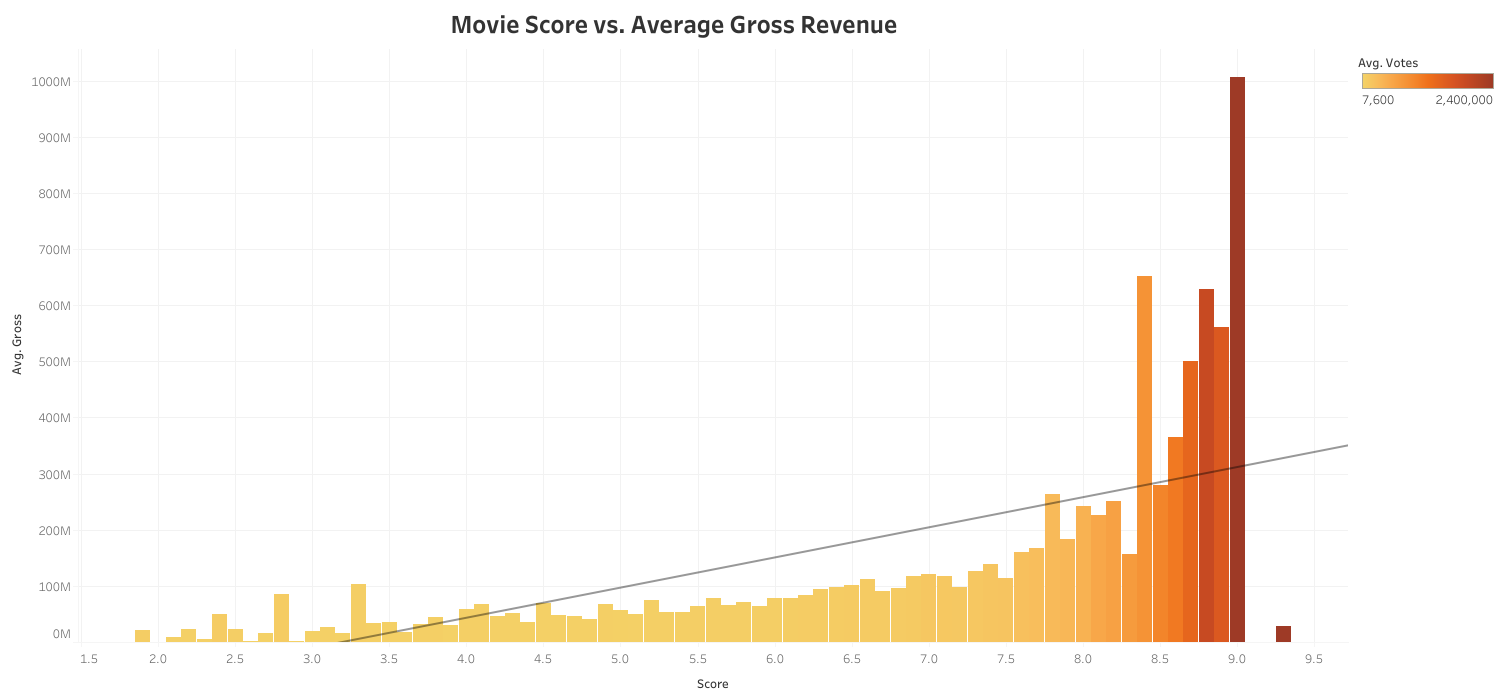

We can definitely see a positive trend that fortifies the fact that movies with higher scores tend to get higher gross revenue. There are some outliers in this chart, for example, where movies around the score of 3.3 received an average gross revenue of 100M, which is on par with movies that have double its score. Another one to notice is the movie around the score of 8.4, which had a gross revenue score of around 650M, beating movies in the 8.5 - 9.0 range. Lastly, the movies with a score of around 9.0 really strengthens the argument of how much a score can impact a movie's gross revenue. Soaring way above the rest of the movies, those movies have the highest gross revenue earned, but we must take all of these outliers with some limitations in mind. Since these represent *average* gross revenue, we don't know if a specific movie score category's success was thanks to a single movie that performed really well or not. Furthermore, a score doesn't necessarily have the be the deciding factor for a movie's success. Genre could be in play and so can a director's influence. That could explain why the movies with a score of 8.4 outperformed the movies in the 8.5 - 9.0 range. Rather than a movie being getting high profits due to its score, there could be nuanced factors that determine its box office success.

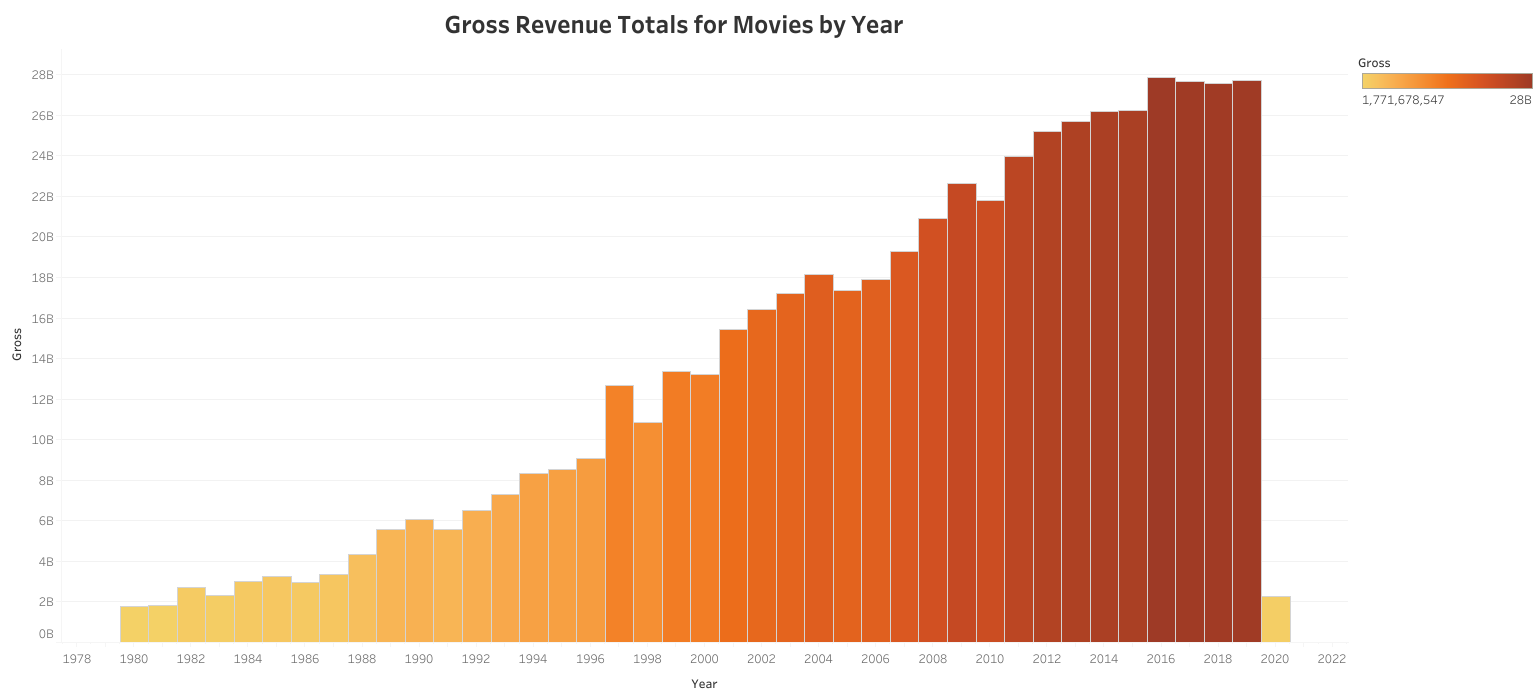

On a final note, if we define a movie as being "good" due to the amount of profits it creates, then based on this chart, we can see that over the years the amount of gross revenue generated has undeniably shot up, which symbolizes movies getting better over time. But since the demand for movies has shot up, budgets have increased in the entertainment industry and more movies can be created. More resources increases the chances for movies to have higher profits as well, but does not provide concrete evidence that movie quality is also rising. 

### Are movies getting better? 
There are a lot of arguments that prove both sides during this exploration. There are many signs that show the movie industry gaining popularity and thus, creating better movies as time goes by, but with charts showing the average movie score being steady over the years with even higher amounts of bad movies being released, it's hard to stand firm on a singular direction. Since movie scores are such a subjective thing, it's also hard to categorize a movie as being good or bad on a scale of 1 - 10 when people have different tastes. Not everyone will like Action or Adventure movies and people that have an eye for Drama movies won't have the same opinions or expertise in other genres. Therefore, it's difficult to say that movies are getting better as time goes by, but we have certainly ammassed evidence that the movie industry is growing and people will continue to watch them--with their own opinions tied to them of course. 